In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [38]:
# x = np.array([np.array([round(20*random.random(),1), round(20*random.random(),1)])-np.array([10,10]) for i in range(20)])

In [5]:
# print(x)

In [2]:
x = [[-0.7, -6.9],
    [-0.4, -4.9],
    [-2.4,  2.4],
    [ 8.2,  1.2],
    [-3.2, -0.4],
    [-5. , -8.4],
    [ 0.1,  3. ],
    [-1.6, -6.5],
    [-1.2,  1.3],
    [-0.7,  3.6],
    [-8.6,  6. ],
    [ 4.6,  4.1],
    [ 2.3, -1. ],
    [ 7.2, -9.5],
    [-0.4, -1. ],
    [ 1.9,  0.9],
    [ 6.5, -5.1],
    [ 9. ,  0.9],
    [-4.3,  2.1],
    [-7.5, -5.3]]

In [3]:
def f(x):
    if x[1] > 3:
        return 1
    else:
        if x[0] < -7:
            return 1
        else:
            if x[0] > 0.5:
                return 1
            else:
                return 0

In [4]:
y = [f(x[i]) for i in range(20)]

X_0 = [x[i] for i in range(len(x)) if y[i] == 0]
X_1 = [x[i] for i in range(len(x)) if y[i] == 1]

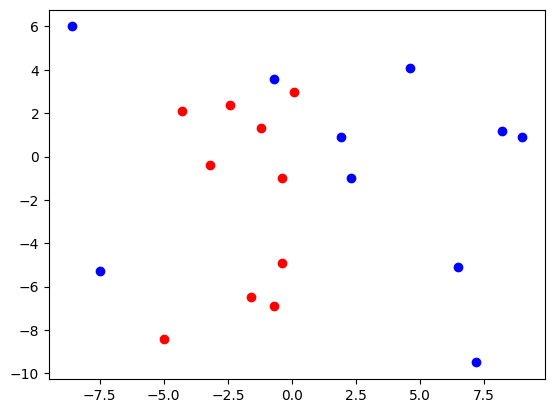

In [5]:
# points
plt.scatter([x[0] for x in X_0], [x[1] for x in X_0], color='red')
plt.scatter([x[0] for x in X_1], [x[1] for x in X_1], color='blue')
plt.show()

In [6]:
df = pd.DataFrame(x, columns=['x_0', 'x_1'])
df['y'] = y
# df.to_csv("points_dtc.csv", index=False)

In [2]:
df = pd.read_csv("points_dtc.csv")
df

,x_0,x_1,y
0,-0.7,-6.9,0
1,-0.4,-4.9,0
2,-2.4,2.4,0
3,8.2,1.2,1
4,-3.2,-0.4,0
5,-5.0,-8.4,0
6,0.1,3.0,0
7,-1.6,-6.5,0
8,-1.2,1.3,0
9,-0.7,3.6,1


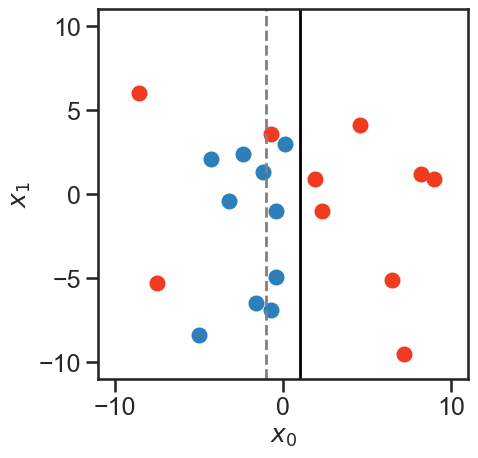

In [10]:
import seaborn as sns
sns.set_theme(style='ticks', context='talk')
import numpy as np

fig, ax = plt.subplots()
colors = {0: '#2c7fb8', 1: '#f03b20'} 

# Group by 'label' and then plot each group
for label, group in df.groupby('y'):
    group.plot(ax=ax, kind='scatter', x='x_0', y='x_1', color=colors[label], s=100)

line = np.linspace(-11, 11, 100)
plt.plot(np.ones(100)*(1.0), line, color='black', linestyle='-', linewidth=2)
# plt.plot(np.ones(100)*(-5.9), line, color='grey', linestyle='--', linewidth=2)
plt.plot(np.ones(100)*(-1.0), line, color='grey', linestyle='--', linewidth=2)
# plt.plot(np.linspace(-11, 1, 100), np.ones(100)*(3.3), color='grey', linestyle='--', linewidth=2)
# plt.plot(np.linspace(-11, 1, 100), np.ones(100)*(-2.9), color='grey', linestyle='--', linewidth=2)
# plt.plot(np.linspace(-11, 11, 100), np.ones(100)*(-2.9), color='grey', linestyle='--', linewidth=2)
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.xlabel('$x_0$', fontsize=18)  
plt.ylabel('$x_1$', fontsize=18) 
plt.tick_params(axis='both', which='major', labelsize=18)
# plt.title('Dataset classes')
# plt.legend()
plt.gca().set_aspect(1)
# plt.savefig('datasets_decisiontree_possible_8.png', dpi=400, format='png', bbox_inches='tight', transparent=True)
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
X = df[['x_0', 'x_1']]
y = df['y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

In [46]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)

print(f"Accuracy score (train) = {acc_train:.2f}, Accuracy score (test) = {acc_test:.2f}")


Accuracy score (train) = 1.00, Accuracy score (test) = 1.00


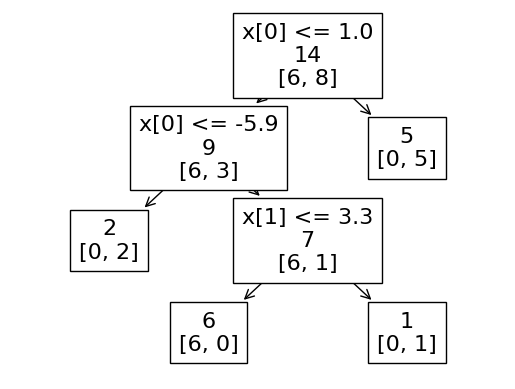

In [47]:
plot_tree(model, label='none', impurity=False)
plt.show()